# Лабораторная работа №1: Формирование и первичная обработка выборки. Ранжированный и интервальный ряды

Выполнили студенты гр. 8382 Кирсанов Артем и Чемова Ксения. Вариант №5

## Цель работы

Ознакомление с основными правилами формирования выборки и подготовки выборочных данных к статистическому анализу.

## Основные теоретические положения



*   Ранжированный ряд – последовательность элементов
выборки, расположенных в порядке возрастания их значений. Номер элемента
ранжированного ряда в последовательности называется рангом.
*   Вариационный ряд – получается из ранжированного ряда в результате
объединения одинаковых элементов. Элементы вариационного ряда
называются вариантами.
*   Интервальный вариационный ряд – это ряд распределения, в котором однородные группы составлены по признаку, меняющемуся непрерывно или принимающему слишком много значений. Для построения интервального ряда требуется рассчитать количество
различных групп. Количество групп определяется, с помощью формулы
Стерджесса: 
 <center>$ k = 1+[3.322\lg(N)] $,</center>
 где $k$ – количество групп, $N$ – объем выборки. <br />
 Ширина интервала $h$ вычисляется по формуле:
 <center>$ h = \frac{x_{max}-x_{min}}{n} $,</center>
 где где $n$ – количество интервалов, $x_{max}$ – максимальное значение выборки, $x_{min}$ –
минимальное значение выборки. <br />
Определяют границы интервалов:
<center>$[x_{min}+(i-1)h; x_{min}+ih], i = 1,2,...,k-1,$</center>
где $i$ – номер интервала. Последний интервал определяется:
<center>$[x_{min}+(k-1)h; x_{min}+kh]$</center>
*   Эмпирической функцией распределения называют
функцию $F(x)$, определяющую для каждого значения $x$ относительную частоту события $X < x$. График представляет собой лестничный график, длин каждой ступеньки которого равна длине соответствующего интервала, а высота – отношению накопленной частоты до середины этого интервала к объему
выборки, то есть
<center>$F(\tilde{x_i})=\frac{m^{slope}_i}{N},m^{slope}_i=\sum_{j=1}^{i-1} m_j, i=1,2,...,k$.</center>

## Постановка задачи

1.   Выбрать программное обеспечение или язык программирования и обосновать его выбор.
2.   Выбрать двумерную генеральную совокупность, предварительно согласовав её с преподавателем. Указать, откуда была взята генеральная совокупность и предоставить ссылку.
3.   Из генеральной совокупности сформировать выборку заданного объёма в соответствии с полученным от преподавателя номером. Указать, каким образом была сформирована выборка и какого вида она получилась.
4.   Последовательно преобразовать выборку в ранжированный, вариационный и интервальный ряды. Результаты содержательно проинтерпретировать и сделать выводы.
5.   Для интервального ряда абсолютных частот построить и отобразить графический полигон, гистограмму и эмпирическую функцию. Сделать выводы.
6.   Аналогичные действия выполнить для интервального ряда относительных частот. Сравнить результаты и сделать выводы.

## Выполнение работы

1.   Лабораторные работы будут выполняться в среде Google Colab с использованием языка программирования Python, так как данный язык хорошо подходит для математических вычислений и их наглядного представления.
2.   Выбрана и согласована с преподавателем генеральная совокупность, взятая по ссылке https://www.kaggle.com/meetnagadia/netflix-stock-price-data-set-20022022.
3.   В соответствии с полученным от преподавателя номером из генеральной совокупности сформирована выборка объемом 105 пар значений из столбцов Open и High. Выборка была сформирована случайным образом по определенному сиду-строке. Итоговая выборка представлена при выполнении фрагмента кода ниже.



In [ ]:
import csv
import random
import pandas as pd
import requests
from io import StringIO

autograph: str = 'Chemova & Kirsanov gang'
sampleVolume: int = 105
url = "https://drive.google.com/uc?export=download&id=1hbi8cfZtsL9Wn885tUGxeBLmULSshuyi"


def loadGeneralPopulation():
    Open: int = 2
    High: int = 3
    df = pd.read_csv(url, header=None, skiprows=1)
    buffer = StringIO()
    df.to_csv(buffer)
    buffer.seek(0)
    reader = csv.reader(buffer)
    return [[float(row[Open]), float(row[High])] for row in reader]


#  Peeks randomly n rows
def makeSample(data, n=sampleVolume):
    dl = len(data)
    if dl < n:
        raise Exception("Too few rows")
    elif dl == n:
        return data
    return random.sample(data, n)  # n unique elements


def main():
    random.seed(autograph)  # Makes the sample be chosen in the same way each time
    generalPopulation = loadGeneralPopulation()
    print('General population:')
    print(generalPopulation)
    sample = makeSample(generalPopulation)
    print('Sample:')
    for i in sample:
      print(i, end='\n')
    

if __name__ == '__main__':
    main()

General population:
[[1.0, 2.0], [1.156429, 1.242857], [1.214286, 1.225], [1.213571, 1.232143], [1.164286, 1.164286], [1.107857, 1.107857], [1.078571, 1.078571], [1.08, 1.149286], [1.135714, 1.14], [1.110714, 1.159286], [1.15, 1.232143], [1.177857, 1.177857], [1.135, 1.175], [1.156429, 1.188571], [1.153571, 1.182143], [1.104286, 1.122143], [1.082143, 1.085714], [1.013571, 1.059286], [0.938571, 0.939286], [0.911429, 0.996429], [0.971429, 1.04], [0.982143, 0.989286], [0.979286, 1.014286], [0.988571, 1.007143], [0.963571, 0.996429], [1.009286, 1.018571], [0.960714, 1.013571], [1.0, 1.046429], [1.053571, 1.195], [1.178571, 1.214286], [1.214286, 1.299286], [1.252143, 1.252143], [1.175, 1.196429], [1.161429, 1.178571], [1.154286, 1.278571], [1.278571, 1.28], [1.242857, 1.248571], [1.152857, 1.157143], [1.145, 1.163571], [1.117143, 1.166429], [1.152857, 1.160714], [1.135714, 1.179286], [1.176429, 1.213571], [1.146429, 1.159286], [1.125, 1.127857], [1.05, 1.058571], [0.896429, 0.924286], [0.89

4.  Выборка последовательно преобразована в ранжированный, вариационный и интервальный ряды.

*   Выборка преобразована в ранжированный ряд сначала по возрастанию Open, затем по возрастанию High.



In [ ]:
import pandas as pd

url = "https://drive.google.com/uc?export=download&id=1DJW7pZFZ_Pzv1DRksFBGxTmt0i5J23vx"

def load_sample():
    df = pd.read_csv(url)
    return df

dataframe = load_sample()
ranked = dataframe.sort_values(by=['Open', 'High'], ascending=[True, True]).reset_index(drop=True)
print(ranked)

           Open        High
0      0.663571    0.665714
1      0.760714    0.793571
2      0.898571    0.927857
3      1.156429    1.188571
4      1.301429    1.331429
..          ...         ...
100  543.500000  549.640015
101  650.239990  665.820007
102  658.179993  666.429993
103  678.270020  688.359985
104  681.239990  685.260010

[105 rows x 2 columns]


*  Выборка преобразована в ранжированный ряд по возрастанию Open.

In [ ]:
import pandas as pd

url = "https://drive.google.com/uc?export=download&id=1DJW7pZFZ_Pzv1DRksFBGxTmt0i5J23vx"

def load_sample():
    df = pd.read_csv(url)
    return df

dataframe = load_sample()
ranked_Open = dataframe.sort_values(by='Open').reset_index(drop=True)
print(ranked_Open)

           Open        High
0      0.663571    0.665714
1      0.760714    0.793571
2      0.898571    0.927857
3      1.156429    1.188571
4      1.301429    1.331429
..          ...         ...
100  543.500000  549.640015
101  650.239990  665.820007
102  658.179993  666.429993
103  678.270020  688.359985
104  681.239990  685.260010

[105 rows x 2 columns]


*  Выборка преобразована в ранжированный ряд по возрастанию High.

In [ ]:
import pandas as pd

url = "https://drive.google.com/uc?export=download&id=1DJW7pZFZ_Pzv1DRksFBGxTmt0i5J23vx"

def load_sample():
    df = pd.read_csv(url)
    return df

dataframe = load_sample()
ranked_High = dataframe.sort_values(by='High').reset_index(drop=True)
print(ranked_High)

           Open        High
0      0.663571    0.665714
1      0.760714    0.793571
2      0.898571    0.927857
3      1.156429    1.188571
4      1.301429    1.331429
..          ...         ...
100  543.500000  549.640015
101  650.239990  665.820007
102  658.179993  666.429993
103  681.239990  685.260010
104  678.270020  688.359985

[105 rows x 2 columns]


*   Выборка преобразована в вариационный ряд по возрастанию Open.

In [ ]:
import pandas as pd

url = "https://drive.google.com/uc?export=download&id=1DJW7pZFZ_Pzv1DRksFBGxTmt0i5J23vx"

def load_sample():
    df = pd.read_csv(url)
    return df

dataframe = load_sample()
ranked_Open = dataframe.sort_values(by='Open').reset_index(drop=True)
variational_Open = pd.Series(ranked_Open['Open']).value_counts(sort=False)
print(variational_Open)

0.663571      1
0.760714      1
0.898571      1
1.156429      1
1.301429      1
             ..
543.500000    1
650.239990    1
658.179993    1
678.270020    1
681.239990    1
Name: Open, Length: 105, dtype: int64


*   Выборка преобразована в вариационный ряд по возрастанию High.

In [ ]:
import pandas as pd

url = "https://drive.google.com/uc?export=download&id=1DJW7pZFZ_Pzv1DRksFBGxTmt0i5J23vx"

def load_sample():
    df = pd.read_csv(url)
    return df

dataframe = load_sample()
ranked_High = dataframe.sort_values(by='High').reset_index(drop=True)
variational_High = pd.Series(ranked_Open['High']).value_counts(sort=False)
print(variational_High)

0.665714      1
0.793571      1
0.927857      1
1.188571      1
1.331429      1
             ..
549.640015    1
665.820007    1
666.429993    1
688.359985    1
685.260010    1
Name: High, Length: 104, dtype: int64


*   Был построен интервальный ряд по возрастанию Open.

In [ ]:
import pandas as pd
import math

url = "https://drive.google.com/uc?export=download&id=1DJW7pZFZ_Pzv1DRksFBGxTmt0i5J23vx"

def load_sample():
    df = pd.read_csv(url)
    return df

def print_interval(ranked, interval, normalize_interval, bins, by=0):
    names = ['Open', 'High']
    print('Interval series (by ascending ' + names[by] + '):')
    keys = interval.keys()
    absolite_values = interval.values
    normalize_values = normalize_interval.values
    print('Interval\t\t\t\t\t| Abs. rate \t|  Rel. rate')
    for i in range(bins):
        print("{:<30}".format(str(keys[i])) + '   \t\t|\t' + str(absolite_values[i]) + '\t|  ' + str(normalize_values[i]))


dataframe = load_sample()
buckets_number = int(1 + 3.322 * math.log10(dataframe.shape[0]))
ranked_Open = dataframe.sort_values(by='Open').reset_index(drop=True)
ranked_High = dataframe.sort_values(by='High').reset_index(drop=True)
interval_Open = pd.Series(ranked_High['Open']).value_counts(sort=False, bins=buckets_number)
normalize_interval_Open = pd.Series(ranked_High['Open']).value_counts(sort=False, bins=buckets_number, normalize=True)
print_interval(ranked_Open, interval_Open, normalize_interval_Open, buckets_number, 0)

Interval series (by ascending Open):
Interval					| Abs. rate 	|  Rel. rate
(-0.018000000000000002, 97.889]   		|	77	|  0.7333333333333333
(97.889, 195.114]                		|	6	|  0.05714285714285714
(195.114, 292.339]               		|	5	|  0.047619047619047616
(292.339, 389.564]               		|	8	|  0.0761904761904762
(389.564, 486.79]                		|	0	|  0.0
(486.79, 584.015]                		|	5	|  0.047619047619047616
(584.015, 681.24]                		|	4	|  0.0380952380952381


*   Был построен интервальный ряд по возрастанию High.

In [ ]:
import pandas as pd
import math

url = "https://drive.google.com/uc?export=download&id=1DJW7pZFZ_Pzv1DRksFBGxTmt0i5J23vx"

def load_sample():
    df = pd.read_csv(url)
    return df

def print_interval(ranked, interval, normalize_interval, bins, by=0):
    names = ['Open', 'High']
    print('Interval series (by ascending ' + names[by] + '):')
    keys = interval.keys()
    absolite_values = interval.values
    normalize_values = normalize_interval.values
    print('Interval\t\t\t\t\t| Abs. rate \t|  Rel. rate')
    for i in range(bins):
        print("{:<30}".format(str(keys[i])) + '   \t\t|\t' + str(absolite_values[i]) + '\t|  ' + str(normalize_values[i]))


dataframe = load_sample()
buckets_number = int(1 + 3.322 * math.log10(dataframe.shape[0]))
ranked_Open = dataframe.sort_values(by='Open').reset_index(drop=True)
ranked_High = dataframe.sort_values(by='High').reset_index(drop=True)
interval_High = pd.Series(ranked_Open['High']).value_counts(sort=False, bins=buckets_number)
normalize_interval_High = pd.Series(ranked_Open['High']).value_counts(sort=False, bins=buckets_number, normalize=True)
print_interval(ranked_High, interval_High, normalize_interval_High, buckets_number, 1)

Interval series (by ascending High):
Interval					| Abs. rate 	|  Rel. rate
(-0.023, 98.908]                 		|	76	|  0.7238095238095238
(98.908, 197.15]                 		|	7	|  0.06666666666666667
(197.15, 295.392]                		|	4	|  0.0380952380952381
(295.392, 393.634]               		|	9	|  0.08571428571428572
(393.634, 491.876]               		|	1	|  0.009523809523809525
(491.876, 590.118]               		|	4	|  0.0380952380952381
(590.118, 688.36]                		|	4	|  0.0380952380952381


По интервальным рядам можно сделать вывод о том, что выборки представляют собой частный случай логнормального распределения, так как большинство вариант находится на первом полуинтервале. Также по вариационному ряду можно заметить, что в выборке Open все значения уникальны, а в High есть две совпадающих варианты.

5. Для интервального ряда абсолютных частот построены и отображены графический полигон, гистограмма и эмпирическая функция.
* Графический полигон, гистограмма и эмпирическая функция для Open.

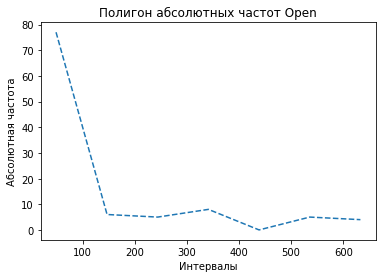

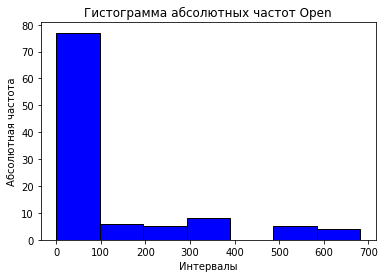

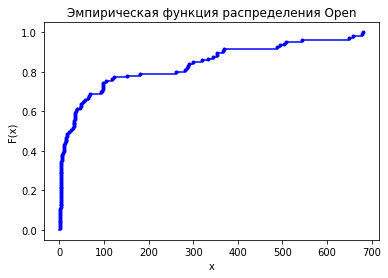

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

url = "https://drive.google.com/uc?export=download&id=1DJW7pZFZ_Pzv1DRksFBGxTmt0i5J23vx"

def load_sample():
    df = pd.read_csv(url)
    return df


def plot(ranked, interval, normalize_interval, bins, by=0):
    names = ['Open', 'High']
    keys = interval.keys()
    absolite_values = interval.values
    normalize_values = normalize_interval.values

    width = keys[0].right - keys[0].left
    centers = [width / 2 + keys[i].left for i in range(bins)]

    plt.plot(centers, absolite_values, '--')
    plt.xlabel('Интервалы')
    plt.ylabel('Абсолютная частота')
    plt.title('Полигон абсолютных частот ' + names[by])
    plt.show()
    plt.clf()

    plt.bar(centers, absolite_values, width=width, edgecolor='black', color='b')
    plt.xlabel('Интервалы')
    plt.ylabel('Абсолютная частота')
    plt.title('Гистограмма абсолютных частот ' + names[by])
    plt.show()
    plt.clf()

    ecdf = ECDF(ranked[names[by]])
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.title('Эмпирическая функция распределения ' + names[by])
    plt.plot([ecdf.x[1] - 1, ecdf.x[1]], [0, 0], color='b')
    for i in range(len(ecdf.x) - 1):
        plt.plot(ecdf.x[i], ecdf.y[i], marker='.', color='b')
        plt.plot([ecdf.x[i], ecdf.x[i + 1]], [ecdf.y[i], ecdf.y[i]], color='b')
    plt.plot(ecdf.x[len(ecdf.x) - 1], ecdf.y[len(ecdf.x) - 1], marker='.', color='b')
    plt.plot([ecdf.x[len(ecdf.x) - 1], ecdf.x[len(ecdf.x) - 1] + 1], [1, 1], color='b')
    plt.show()
    plt.clf()


dataframe = load_sample()
buckets_number = int(1 + 3.322 * math.log10(dataframe.shape[0]))
ranked_Open = dataframe.sort_values(by='Open').reset_index(drop=True)
ranked_High = dataframe.sort_values(by='High').reset_index(drop=True)
interval_Open = pd.Series(ranked_High['Open']).value_counts(sort=False, bins=buckets_number)
normalize_interval_Open = pd.Series(ranked_High['Open']).value_counts(sort=False, bins=buckets_number, normalize=True)
plot(ranked_Open, interval_Open, normalize_interval_Open, buckets_number, 0)

* Графический полигон, гистограмма и эмпирическая функция для High.

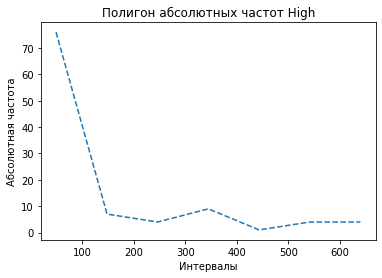

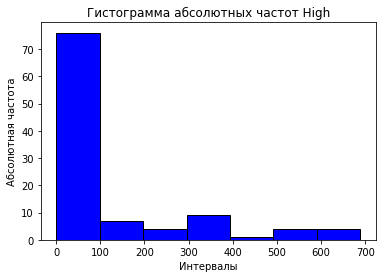

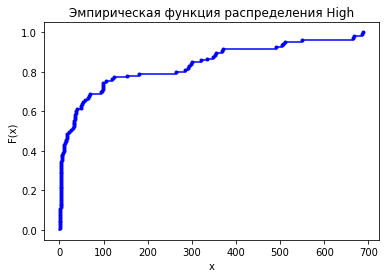

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

url = "https://drive.google.com/uc?export=download&id=1DJW7pZFZ_Pzv1DRksFBGxTmt0i5J23vx"

def load_sample():
    df = pd.read_csv(url)
    return df


def plot(ranked, interval, normalize_interval, bins, by=0):
    names = ['Open', 'High']
    keys = interval.keys()
    absolite_values = interval.values
    normalize_values = normalize_interval.values

    width = keys[0].right - keys[0].left
    centers = [width / 2 + keys[i].left for i in range(bins)]

    plt.plot(centers, absolite_values, '--')
    plt.xlabel('Интервалы')
    plt.ylabel('Абсолютная частота')
    plt.title('Полигон абсолютных частот ' + names[by])
    plt.show()
    plt.clf()

    plt.bar(centers, absolite_values, width=width, edgecolor='black', color='b')
    plt.xlabel('Интервалы')
    plt.ylabel('Абсолютная частота')
    plt.title('Гистограмма абсолютных частот ' + names[by])
    plt.show()
    plt.clf()

    ecdf = ECDF(ranked[names[by]])
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.title('Эмпирическая функция распределения ' + names[by])
    plt.plot([ecdf.x[1] - 1, ecdf.x[1]], [0, 0], color='b')
    for i in range(len(ecdf.x) - 1):
        plt.plot(ecdf.x[i], ecdf.y[i], marker='.', color='b')
        plt.plot([ecdf.x[i], ecdf.x[i + 1]], [ecdf.y[i], ecdf.y[i]], color='b')
    plt.plot(ecdf.x[len(ecdf.x) - 1], ecdf.y[len(ecdf.x) - 1], marker='.', color='b')
    plt.plot([ecdf.x[len(ecdf.x) - 1], ecdf.x[len(ecdf.x) - 1] + 1], [1, 1], color='b')
    plt.show()
    plt.clf()


dataframe = load_sample()
buckets_number = int(1 + 3.322 * math.log10(dataframe.shape[0]))
ranked_Open = dataframe.sort_values(by='Open').reset_index(drop=True)
ranked_High = dataframe.sort_values(by='High').reset_index(drop=True)
interval_High = pd.Series(ranked_Open['High']).value_counts(sort=False, bins=buckets_number)
normalize_interval_High = pd.Series(ranked_Open['High']).value_counts(sort=False, bins=buckets_number, normalize=True)
plot(ranked_High, interval_High, normalize_interval_High, buckets_number, 1)

По результатам данного пункта можно наглядно предположить, что выборка может быть частным случаем логнормального распределения.

6.  Аналогичные действия выполнены для интервального ряда относительных частот.

* Графический полигон, гистограмма и эмпирическая функция для относительных частот для Open.

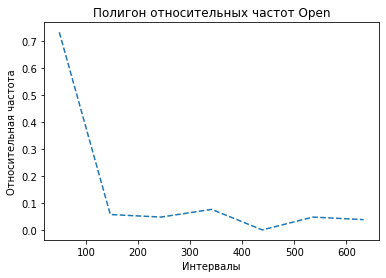

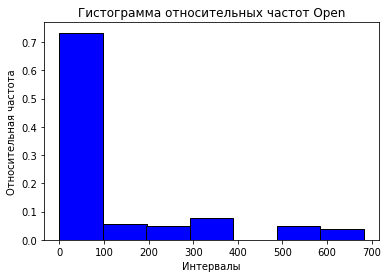

[77  6  5  8  0  5  4] [-inf   0.   4.   5.   5.   6.   8.  77.]


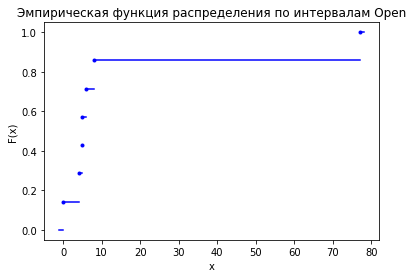

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

url = "https://drive.google.com/uc?export=download&id=1DJW7pZFZ_Pzv1DRksFBGxTmt0i5J23vx"

def load_sample():
    df = pd.read_csv(url)
    return df


def plot(ranked, interval, normalize_interval, bins, by=0):
    names = ['Open', 'High']
    keys = interval.keys()
    absolite_values = interval.values
    normalize_values = normalize_interval.values

    width = keys[0].right - keys[0].left
    centers = [width / 2 + keys[i].left for i in range(bins)]

    plt.plot(centers, normalize_values, '--')
    plt.xlabel('Интервалы')
    plt.ylabel('Относительная частота')
    plt.title('Полигон относительных частот ' + names[by])
    plt.show()
    plt.clf()

    plt.bar(centers, normalize_values, width=width, edgecolor='black', color='b')
    plt.xlabel('Интервалы')
    plt.ylabel('Относительная частота')
    plt.title('Гистограмма относительных частот ' + names[by])
    plt.show()
    plt.clf()

    ecdf = ECDF(absolite_values)
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.title('Эмпирическая функция распределения по интервалам ' + names[by])
    plt.plot([ecdf.x[1] - 1, ecdf.x[1]], [0, 0], color='b')
    for i in range(len(ecdf.x) - 1):
        plt.plot(ecdf.x[i], ecdf.y[i], marker='.', color='b')
        plt.plot([ecdf.x[i], ecdf.x[i + 1]], [ecdf.y[i], ecdf.y[i]], color='b')
    plt.plot(ecdf.x[len(ecdf.x) - 1], ecdf.y[len(ecdf.x) - 1], marker='.', color='b')
    plt.plot([ecdf.x[len(ecdf.x) - 1], ecdf.x[len(ecdf.x) - 1] + 1], [1, 1], color='b')
    plt.show()
    plt.clf()


dataframe = load_sample()
buckets_number = int(1 + 3.322 * math.log10(dataframe.shape[0]))
ranked_Open = dataframe.sort_values(by='Open').reset_index(drop=True)
ranked_High = dataframe.sort_values(by='High').reset_index(drop=True)
interval_Open = pd.Series(ranked_High['Open']).value_counts(sort=False, bins=buckets_number)
normalize_interval_Open = pd.Series(ranked_High['Open']).value_counts(sort=False, bins=buckets_number, normalize=True)
plot(ranked_Open, interval_Open, normalize_interval_Open, buckets_number, 0)

* Графический полигон, гистограмма и эмпирическая функция для относительных частот для High.

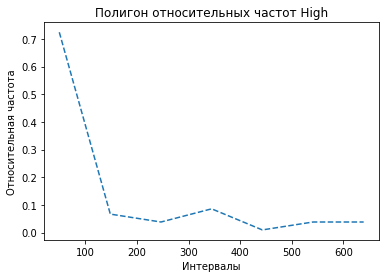

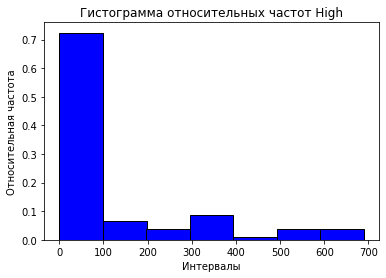

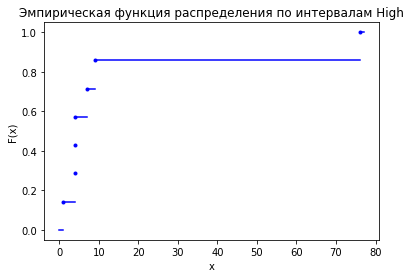

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

url = "https://drive.google.com/uc?export=download&id=1DJW7pZFZ_Pzv1DRksFBGxTmt0i5J23vx"

def load_sample():
    df = pd.read_csv(url)
    return df


def plot(ranked, interval, normalize_interval, bins, by=0):
    names = ['Open', 'High']
    keys = interval.keys()
    absolite_values = interval.values
    normalize_values = normalize_interval.values

    width = keys[0].right - keys[0].left
    centers = [width / 2 + keys[i].left for i in range(bins)]

    plt.plot(centers, normalize_values, '--')
    plt.xlabel('Интервалы')
    plt.ylabel('Относительная частота')
    plt.title('Полигон относительных частот ' + names[by])
    plt.show()
    plt.clf()

    plt.bar(centers, normalize_values, width=width, edgecolor='black', color='b')
    plt.xlabel('Интервалы')
    plt.ylabel('Относительная частота')
    plt.title('Гистограмма относительных частот ' + names[by])
    plt.show()
    plt.clf()

    ecdf = ECDF(absolite_values)
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.title('Эмпирическая функция распределения по интервалам ' + names[by])
    plt.plot([ecdf.x[1] - 1, ecdf.x[1]], [0, 0], color='b')
    for i in range(len(ecdf.x) - 1):
        plt.plot(ecdf.x[i], ecdf.y[i], marker='.', color='b')
        plt.plot([ecdf.x[i], ecdf.x[i + 1]], [ecdf.y[i], ecdf.y[i]], color='b')
    plt.plot(ecdf.x[len(ecdf.x) - 1], ecdf.y[len(ecdf.x) - 1], marker='.', color='b')
    plt.plot([ecdf.x[len(ecdf.x) - 1], ecdf.x[len(ecdf.x) - 1] + 1], [1, 1], color='b')
    plt.show()
    plt.clf()


dataframe = load_sample()
buckets_number = int(1 + 3.322 * math.log10(dataframe.shape[0]))
ranked_Open = dataframe.sort_values(by='Open').reset_index(drop=True)
ranked_High = dataframe.sort_values(by='High').reset_index(drop=True)
interval_High = pd.Series(ranked_Open['High']).value_counts(sort=False, bins=buckets_number)
normalize_interval_High = pd.Series(ranked_Open['High']).value_counts(sort=False, bins=buckets_number, normalize=True)
plot(ranked_High, interval_High, normalize_interval_High, buckets_number, 1)

## Выводы

В ходе выполнения лабораторной работы был изучен и применен на практике метод формирования выборки из генеральной совокупности. Соответственно, была сформирована выборка случайным образом, был получен ранжированный ряд, путем сортировки по возрастанию сначала по одному признаку, потом по другому, был получен вариационный ряд путем подсчета и объединения совпадающих элементов в вариационном ряду для каждого из признаков, был получен интервальный ряд, где подсчитывалось число элементов в каждом из интервалов, а число интервалов было получено при помощи формулы Стерджесса. По интервальному ряду были построены гистограмма, полигон частот и эмпирическая функция, которая также была построена и для выборки.
При анализе высоты столбцов гистограмм и очертаний полигонов частот был сделан предварительный вывод о том, что выборки признаков Open и High представляет из себя выборку из логнормального распределения.
